In [1]:
from numpy import load

data = load('mnist.npz')
lst = data.files
for item in lst:
    print(item)
    print(data[item])

x_test
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
x_train
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import seaborn as sns

In [2]:
from keras.datasets import mnist

#loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#printing the shapes of the vectors
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

11490434/11490434 [==============================] - 2s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [3]:
X_train_flat = X_train/255.0
X_test_flat = X_test/255.0

X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

X_train_flat = X_train_flat[0:100][:]
y_train = y_train[0:100]

In [5]:
from sklearn.preprocessing import scale
X_test_flat = scale(X_test_flat)
X_train_flat = scale(X_train_flat)

In [7]:
from sklearn.svm import SVC

model_linear = SVC(kernel='linear')
model_linear.fit(X_train_flat, y_train)

SVC(kernel='linear')

In [8]:
from sklearn import metrics
# predict
y_pred = model_linear.predict(X_test_flat)

# accuracy
print("accuracy:", metrics.accuracy_score(y_test, y_pred), "\n")

accuracy: 0.6668 



In [9]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 861,    2,    4,    4,   20,   20,   17,    3,    4,   45],
       [   0, 1097,    0,    2,    0,    4,    1,    0,   25,    6],
       [  31,  267,  477,   37,   55,   14,   29,   17,   79,   26],
       [  21,   46,   22,  817,    2,   17,    2,    3,   37,   43],
       [   1,   16,    9,    0,  760,    9,   16,   21,    1,  149],
       [  41,   34,   10,  238,   85,  262,   23,    8,   66,  125],
       [  32,   60,   33,    2,  150,    4,  637,   15,    1,   24],
       [   3,   62,    2,   27,   24,   13,    0,  658,   23,  216],
       [  68,   66,   19,   80,   32,   33,   15,    5,  514,  142],
       [  19,   12,    6,   29,  225,    5,    0,  117,   11,  585]],
      dtype=int64)

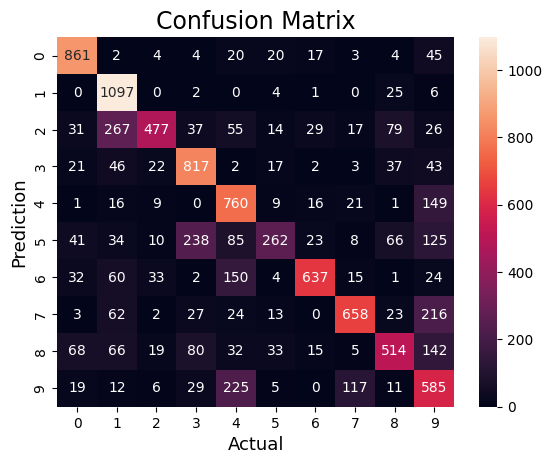

In [10]:
sns.heatmap(cm,
			annot=True,
			fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()